# Estágio Data Science - Scicrop - Aline


In [39]:
# Importando todas as bibliotecas a serem usadas no projeto
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics as metrics

### Conhecendo o Dataset

In [40]:
# Importando os dados de treino e de teste
safra_2018 = pd.read_csv('Safra_2018-2019.csv')
safra_2020 = pd.read_csv('Safra_2020.csv')

Para realizar a predição é necessário pré-processar esse dataset e verificar quais são as features mais relevantes para esse treinamento:

In [41]:
safra_2018.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [42]:
# Preenchendo dados nulos
safra_2018 = safra_2018.fillna(0)
safra_2020 = safra_2020.fillna(0)

In [43]:
#Conhecendo os dados de safra_2020
safra_2020.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,0.0,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1


In [44]:
#irei utilizar o algoritmo de classificação KNN
#separando a tabela em features and targets
X = safra_2018.iloc[:, 2:10] 
Y = safra_2018['dano_na_plantacao'] 

In [45]:
#Separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y) 
knn = KNeighborsClassifier(n_neighbors= 31)

In [46]:
#treinando o modelo preditivo
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [47]:
#checando a precisão do classificador
knn.score(x_test, y_test)

0.83485

In [48]:
#utilizando as caracteristicas da safra de 2020
X_2020 = safra_2020.iloc[:,2:]
#predizendo dano_na_plantacao 2020
safra_2020['dano_na_plantacao'] = knn.predict(X_2020)

In [49]:
#visualizando a tabela
safra_2020.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1,0
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1,0
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2,0
3,80003,SCROP80004,283,0,1,2,15,0.0,7,2,0
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1,0


<BarContainer object of 2 artists>

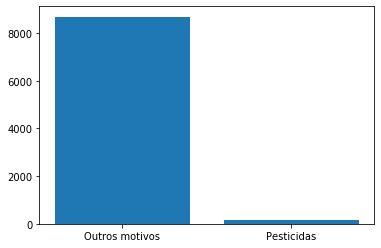

In [63]:
#visulização dos dados dos danos na plantação
bars = safra_2020['dano_na_plantacao'].value_counts()
plt.bar(bars.index, bars.values, tick_label = ['Outros motivos', 'Pesticidas'])